#### Eric Bochsler $$$$ Astronomy 425 $$$$ Problem Set 3 $$$$

$1.$ In this problem I derive the Fluid Equation $\dot{\epsilon(t)}+ {3\dot{a(t)} \over a(t)}(\epsilon(t)+P(t))=0$ from the Acceleration Equation ${\ddot{a(t)} \over a(t)} = -{4 \pi G\over 3c^{2}}[\epsilon(t) + 3P(t)]$ and the Friedmann Equation below: $$$$ 
$({\dot{a(t)} \over a(t)})^{2}={8 \pi G \epsilon(t) \over 3c^{2}}-{kc^{2} \over a(t)^{2}}$ 
$$$$
${d \over dt}{\dot{a(t)}^{2} \over a(t)^{2}}={d \over dt} ({8 \pi G \epsilon(t) \over 3c^{2}}-{kc^{2} \over a(t)^{2}})$ $$$$
$ {2 \dot{a(t)} \ddot{a(t)} \over a(t)^{2}}-{2\dot{a(t)}^{3} \over a(t)^{3}}={8 \pi G \dot{\epsilon(t)} \over 3c^{2} \dot{a(t)}} + {2kc^{2} \over a(t)^{3}}$ 
$$$$
${\ddot{a(t)} \over a(t)} - ({\dot{a(t)} \over a(t)})^{2}={4 \pi G \dot{\epsilon(t)}a(t) \over 3c^{2}\dot{a(t)}} + {kc^{2} \over a(t)^{2}}$ 
$$$$
${\ddot{a(t)} \over a(t)} - ({8 \pi G \epsilon(t) \over 3c^{2}}-{kc^{2} \over a(t)^{2}})={4 \pi G \dot{\epsilon(t)}a(t) \over 3c^{2}\dot{a(t)}} + {kc^{2} \over a(t)^{2}}$
$$$$
${\ddot{a(t)} \over a(t)} - {8 \pi G \epsilon(t) \over 3c^{2}}={4 \pi G \dot{\epsilon(t)}a(t) \over 3c^{2}\dot{a(t)}}$
$$$$
${\ddot{a(t)} \over a(t)} = {8 \pi G \epsilon(t) \over 3c^{2}}+{4 \pi G \dot{\epsilon(t)}a(t) \over 3c^{2}\dot{a(t)}}$
$$$$
$-{4 \pi G\over 3c^{2}}[\epsilon(t) + 3P(t)]={8 \pi G \epsilon(t) \over 3c^{2}}+{4 \pi G \dot{\epsilon(t)}a(t) \over 3c^{2}\dot{a(t)}}$
$$$$
$-[\epsilon(t) + 3P(t)]=2 \epsilon(t) + {\dot{\epsilon(t)}a(t) \over \dot{a(t)}}$
$$$$
$[\epsilon(t) + 3P(t)]+2 \epsilon(t) + {\dot{\epsilon(t)}a(t) \over \dot{a(t)}}=0$
$$$$
$3[\epsilon(t) + P(t)]+ {\dot{\epsilon(t)}a(t) \over \dot{a(t)}}=0$
$$$$
${3\dot{a(t)} \over a(t)}[\epsilon(t) + P(t)]+ \dot{\epsilon(t)}=0$
$$$$
Description of Steps: The derivative of both sides of the Friedmann Equation were found, and the expression simplified. The $({\dot{a(t)} \over a(t)})^{2}$ term was substituted using the Friedmann Equation with the result allowing terms to be canceled. The equation was solved for ${\ddot{a(t)} \over a(t)}$ and set equal to the RHS of the Acceleration Equation. This expression was then simplified and resulted in the Fluid Equation. This derivation demonstrates that only two of the three equations are independent.

$2.$ $$$$
$({H(z) \over H_0})^2 =( \Omega_{r,0}(1+z)^4+ \Omega_{m,0}(1+z)^3+ \Omega_{ \Lambda,0}+ (1- \Omega_0)(1+z)^2)$ $$$$

In [6]:
%pylab inline

from scipy.integrate import quad

H0 = 70 #km s^-1 Mpc^-1
c = 3.0e5 #km s^-1
def Hz(H0, Omr, Omm, Oml, z):
    Om0 = Omr + Omm + Oml
    return H0*( Omr*(1+z)**(4.0) + Omm*(1+z)**(3.0) + Oml + (1-Om0)*(1+z)**(2.0) )**(1.0/2.0)
redshift = np.linspace(0, 10, 100)
universeA = lambda redshift: c / Hz(H0,0,0.3,0.7,redshift)
universeB = lambda redshift: c / Hz(H0,0.5,0.5,0,redshift)
coMoveA = np.array([])
coMoveB = np.array([])
H = H0 * (3.15e16/3e19) #Hubble Constant for Age in Gyr (s to Gyr, Mpc to km)
for i in redshift:
    A = quad(universeA, 0, i)
    B = quad(universeB, 0, i)
    coMoveA = np.append(coMoveA, A[0])
    coMoveB = np.append(coMoveB, B[0])
    
ageA = np.array([])
ageB = np.array([])
tEquationA = lambda redshift: (1+redshift)**(-1.0)*(Hz(H,0,0.3,0.7,redshift))**(-1.0)
tEquationB = lambda redshift: (1+redshift)**(-1.0)*(Hz(H,0.5,0.5,0,redshift))**(-1.0)
for j in redshift:
    A = quad(tEquationA, 0, j)
    B = quad(tEquationB, 0, j)
    ageA = np.append(ageA, A[0])
    ageB = np.append(ageB, B[0])

Populating the interactive namespace from numpy and matplotlib


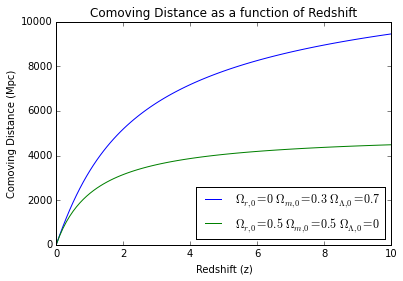

In [7]:
#Plot of Co-Moving Distance
figure()
plot(redshift, coMoveA, label = '$ \Omega_{r,0}=0 \ \Omega_{m,0}=0.3 \ \Omega_{ \Lambda,0}=0.7 $')
plot(redshift, coMoveB, label = '$ \Omega_{r,0}=0.5 \ \Omega_{m,0}=0.5 \ \Omega_{ \Lambda,0}=0 $')
title('Comoving Distance as a function of Redshift')
xlabel('Redshift (z)')
ylabel('Comoving Distance (Mpc)')
legend(loc=4)
show()

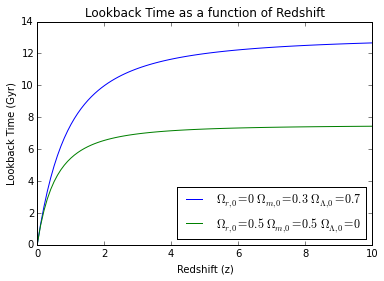

In [8]:
#Plot of Age of Universe
figure()
plot(redshift, ageA, label = '$ \Omega_{r,0}=0 \ \Omega_{m,0}=0.3 \ \Omega_{ \Lambda,0}=0.7 $')
plot(redshift, ageB, label = '$ \Omega_{r,0}=0.5 \ \Omega_{m,0}=0.5 \ \Omega_{ \Lambda,0}=0 $')
title('Lookback Time as a function of Redshift')
xlabel('Redshift (z)')
ylabel('Lookback Time (Gyr)')
legend(loc=4)
show()

$3.$ Using the program from above, I found the value of $\Omega_{m,0}$ for a matter-only, open universe that would result in the same age as our benchmark flat universe with $\Omega_{m,0} = 0.3$ and $\Omega_{\Lambda,0}=0.7$. The result was obtained using the while loop below. The value was found to be $\Omega_{m,0} = 0.021458$

In [78]:
age1 = quad(tEquationA, 0, 10000)
benchmarkAge = age1[0]
incrementSize = 0.000001
omegaM = 0.0
openAge = 6000 #arbitrary number larger than benchmark age in Gyr
while(benchmarkAge <= openAge):
    omegaM += incrementSize
    tEquation3 = lambda redshift: (1+redshift)**(-1.0)*(Hz(H,0,omegaM,0,redshift))**(-1.0)
    age2 = quad(tEquation3, 0, 10000)
    openAge = age2[0]
    
print 'Age of Open Universe with determined Omega matter value: ',openAge
print 'Age of Benchmark Universe: ', benchmarkAge
print 'Determined Value of Omega matter: ', omegaM

Age of Open Universe with determined Omega matter value:  13.1169813419
Age of Benchmark Universe:  13.1169818321
Determined Value of Omega matter:  0.021458
